In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [44]:
digits=load_digits()

In [45]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [46]:
df=pd.DataFrame(digits.data)
print(df.head())
print(df.shape)

    0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]
(1797, 64)


In [47]:
df.columns


RangeIndex(start=0, stop=64, step=1)

In [48]:
df.target=pd.DataFrame(digits.target)
#df.values

In [49]:
from sklearn.model_selection import train_test_split
x=df
y=df.target
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12)

print(x)
print(y)

       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0

In [50]:
model1=SVC(kernel='rbf',random_state=0, probability=True)
model1.fit(x_train,y_train)
y_pred_1=model1.predict(x_test)
print("Model Score of Kernal(rbf) :", model1.score(x_test,y_test))
accuracy1=accuracy_score(y_test,y_pred_1)


model2=SVC(kernel='linear',random_state=0, probability=True)
model2.fit(x_train,y_train)
y_pred_2=model2.predict(x_test)
print("Model Score of Kernal(linear) :", model2.score(x_test,y_test))
accuracy2=accuracy_score(y_test,y_pred_2)


model3=SVC(kernel='poly',random_state=0, probability=True)
model3.fit(x_train,y_train)
y_pred_3=model3.predict(x_test)
print("Model Score of Kernal(poly) :", model3.score(x_test,y_test))
accuracy3=accuracy_score(y_test,y_pred_3)



Model Score of Kernal(rbf) : 0.9916666666666667
Model Score of Kernal(linear) : 0.975
Model Score of Kernal(poly) : 0.9944444444444445


In [51]:

from sklearn.metrics import confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred_3))
cm

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_3)
mse
model1_C=SVC(C=3)
model1_C.fit(x_train,y_train)
model1_C.score(x_test,y_test)
model2_C=SVC(C=3)
model2_C.fit(x_train,y_train)
model2_C.score(x_test,y_test)
model3_C=SVC(C=3)
model3_C.fit(x_train,y_train)
model3_C.score(x_test,y_test)
plt.figure(figsize=(5,5))


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

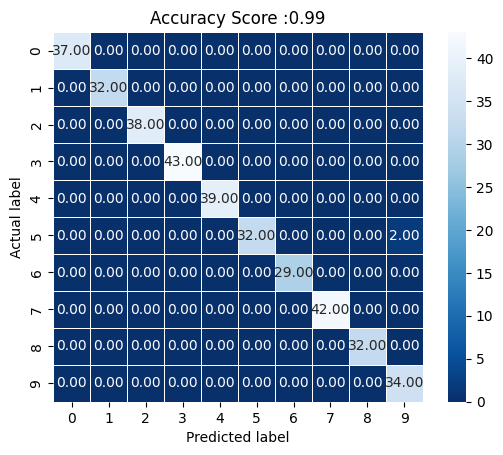

In [52]:

sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
A=f'Accuracy Score :{accuracy:.2f}'
plt.title(A)
plt.show()

In [53]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_1=logreg.predict(x_test)
print("Model Score of LogReg :", logreg.score(x_test,y_test))
accuracy=accuracy_score(y_test,y_pred_1)
#print('ACCURACY is',accuracy)

Model Score of LogReg : 0.9694444444444444


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_2=knn.predict(x_test)
print("Model Score of LogReg :", knn.score(x_test,y_test))
accuracy=accuracy_score(y_test,y_pred_2)
#print('ACCURACY is',accuracy)


Model Score of LogReg : 0.9861111111111112


In [55]:
result = ({
    'model':['KNN','Logistic Regression','SVM rbf','SVM Linear','SVM Poly'],
    'training score' :[knn.score(x_train,y_train),logreg.score(x_train,y_train),model1.score(x_train,y_train),model2.score(x_train,y_train),model3.score(x_train,y_train)],
    'test score':[knn.best_score_,logreg.best_score_,model1.best_score_,model2.best_score_,model3.best_score_],
    'average fit time':[knn.cv_results_['mean_fit_time'].mean(),logreg.cv_results_['mean_fit_time'].mean(),model1.cv_results_['mean_fit_time'].mean(),model2.cv_results_['mean_fit_time'].mean(),model3.cv_results_['mean_fit_time'].mean()]
               })
results_df = pd.DataFrame(result)

AttributeError: ignored

In [56]:
from functools import reduce

def _get_model_name(model):
    """
            Returns a string with the name of a sklearn model
                model: Sklearn stimator class
    """
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
        name = "Pipeline_" + str(estimator)[:str(estimator).find("(")]
    else:
        name = str(model)[:str(model).find("(")]
    return name

In [57]:
def plot_cv_score(X, y, models_list, cv = 5, scoring_list = None, refit = True, return_scores = False):
    """
            X: numpy_array/pandas dataframe n_rows, m_features
            y: numpy_array/pandas dataframe n_rows
            Plots min, max and avg kfold crosval_score for a list of models
    """

    names, mean_score = list(), list()
    ldf = list()
    mnames = list()

    for i, model in enumerate(models_list):
        name = _get_model_name(model)

        if refit:
            model.fit(X, y)

        for metric in score_list:

            score = cross_val_score(model, X, y, cv = cv, scoring = metric, n_jobs= -1)
            mean_score.append(np.mean(score))

        tmp = pd.DataFrame({name: mean_score}, index = score_list)
        ldf.append(tmp)
        mean_score = list()

    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index = True, right_index = True), ldf).T
    fig, ax  = plt.subplots(1,1, figsize = (10,5))
    frame_scores.plot.bar(ax = ax, cmap = 'RdYlBu', edgecolor = "black")
    ax.legend(loc = 'best')
    ax.set_xlabel("Score")
    ax.set_title("Cross Validation Model Comparison")
    plt.show()
    if return_scores:
        return frame_scores

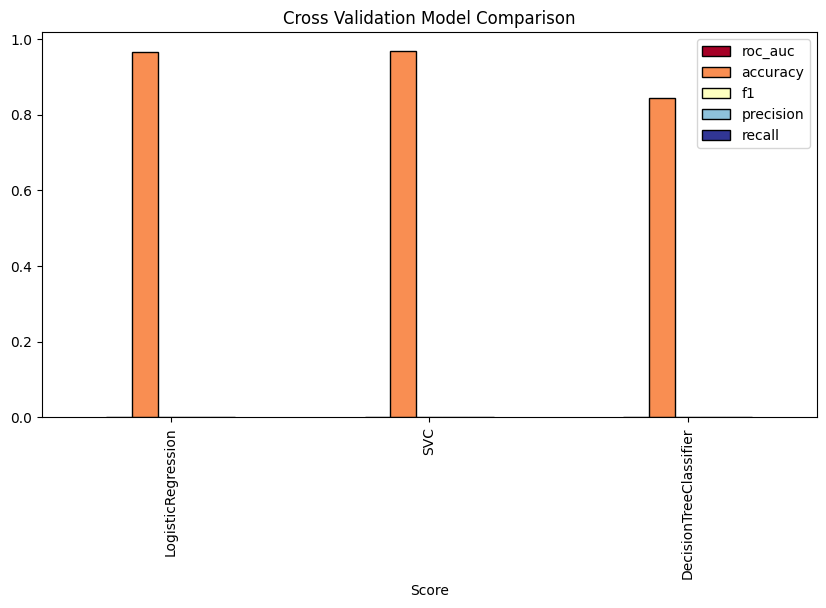

In [60]:
models_list =[LogisticRegression(random_state = 42),
              SVC(C=1, gamma=0.0001, kernel='rbf',probability= True),
              DecisionTreeClassifier(random_state = 42)]

score_list = ["roc_auc", "accuracy", "f1", "precision", "recall"]

t = plot_cv_score(X = x_train, y = y_train, models_list = models_list, cv = 5, scoring_list = score_list, refit = True)
